## Задание 1

Дан список неотрицательных чисел. Сформируйте из них наибольшее возможное число. У получившегося числа не должно быть ведущих незначимых нулей.

*Подсказка*: прочитать о том, как можно сортировать коллекции с использованием компаратора можно [тут](https://docs.python.org/3/howto/sorting.html#the-old-way-using-the-cmp-parameter).

In [1]:
from functools import cmp_to_key

def reverse_numeric(x, y):
    if x == y:
        return True
    s1, s2 = str(x), str(y)
    if s1.startswith(s2):
        while s1.startswith(s2):
            s1 = s1[len(s2):]
        if s1 > s2:
            return -1
        else:
            return 1
    elif s2.startswith(s1):
        while s2.startswith(s1):
            s2 = s2[len(s1):]
        if s2 < s1:
            return -1
        else:
            return 1
    if s1 > s2:
        return -1
    else:
        return 1
    
def make_biggest_number(a):
    return int(''.join(map(str, sorted(a, key=cmp_to_key(reverse_numeric)))))

In [2]:
assert make_biggest_number([3, 30, 34, 5, 9]) == 9534330

In [3]:
assert make_biggest_number([0, 0, 0]) == 0

In [4]:
assert make_biggest_number([8, 89]) == 898

In [5]:
assert make_biggest_number([27, 271]) == 27271

In [6]:
assert make_biggest_number([12, 121]) == 12121

## Задание 2

Напишите батч-итератор, который бы позволял считывать изображения из заданной директории батчами. Иными словами нужно считывать частями и не хранить их все в памяти. Итератор должен иметь возможность выдавать изображения в перемешанном (случайном) порядке.

*Подсказка:*
Получить все имена файлов в директории можно, например, так:
```python
_, _, filenames = next(os.walk(path))
```
Считать изображение так:
```python
image = Image.open(filename)
```

In [7]:
import os
import random

from PIL import Image

class BatchIterator:
    def __init__(self, path, size=10, shuffle=False):
        self.filenames = [f for _, _, f in os.walk('images')]
        self.path = path
        self.size = size
        self.batch = 0
        self.shuffle = shuffle
        if shuffle:
            random.shuffle(self.filenames[0])
        self.num_batches = len(self.filenames[0]) // size + \
                int(len(self.filenames[0]) % size != 0)
    def __iter__(self):
        return self

    def __next__(self):
        if self.batch >= self.num_batches:
            raise StopIteration
        batch = self.batch
        self.batch += 1
        return list(map(lambda x: Image.open(self.path + '/' + x),
                          self.filenames[0][batch * self.size:(batch + 1) * self.size]))

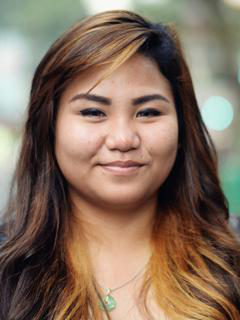

In [8]:
it = BatchIterator('images', size=10)
next(it)[0]

In [9]:
next(it)

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x7FBCE810C908>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x7FBCE810CA90>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x7FBCE810CB00>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x7FBCE810CB70>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x7FBCE810CBE0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x7FBCE810CC50>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x7FBCE810CCC0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x7FBCE810CD30>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x7FBCE810CDA0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=240x320 at 0x7FBCE810CE10>]

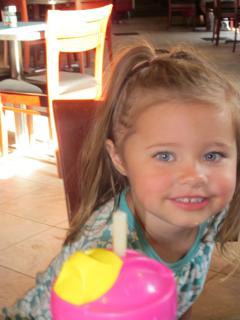

In [10]:
for i, image in enumerate(BatchIterator('images', size=5, shuffle=True)):
    if i == 5:
        break
        
image[0]

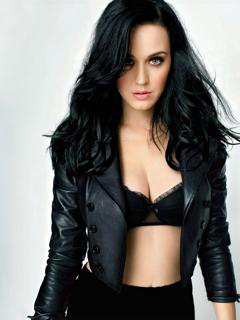

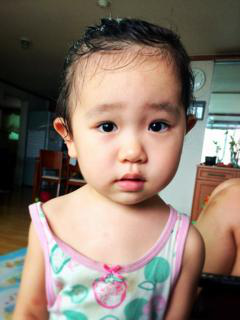

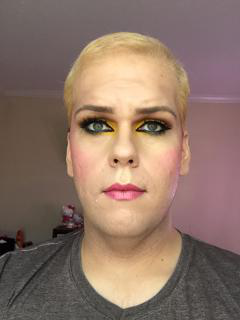

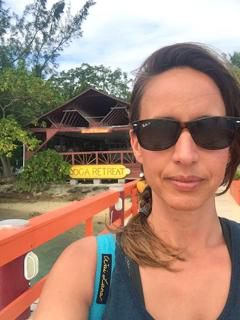

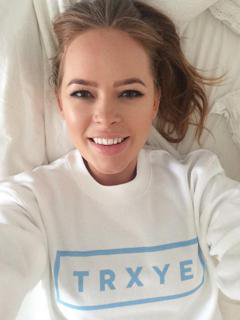

In [11]:
from IPython.display import display
for i, image in enumerate(BatchIterator('images', size=20, shuffle=True)):
    display(image[0])

In [ ]:
it = BatchIterator('images', size=10)

In [ ]:
next(it)[0]

In [ ]:
next(it)

In [ ]:
for i, image in enumerate(BatchIterator('images', size=5, shuffle=True)):
    if i == 5:
        break
        
image[0]

----

### Задание 3

Сформировать статистическую гипотезу и проверить, отличается ли средняя скорость готовки ресторанов с рейтингом 2 балла и рейтингом 3 балла.

*Примечание*: использовать уровень значимости равный 1%.

In [12]:
import pandas as pd
df = pd.read_csv('files/quality_restaurants.csv')

In [13]:
import matplotlib.pyplot as plt
from scipy import stats

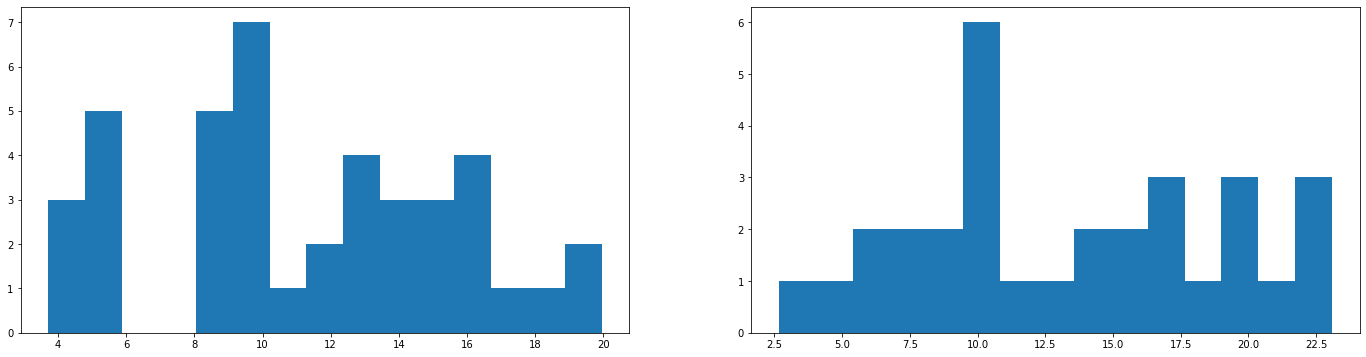

In [14]:
rating2_sample = df[df.rating == 2]['avg_cook_time']
rating3_sample = df[df.rating == 3]['avg_cook_time']
fig = plt.figure(figsize=(24, 6))
ax1 = plt.subplot(121)
plt.hist(rating2_sample , 15)
ax2 = plt.subplot(122)
plt.hist(rating3_sample, 15)
plt.show()

In [15]:
stats.shapiro(rating2_sample), stats.shapiro(rating3_sample)

((0.9670805931091309, 0.2759011685848236),
 (0.9608728885650635, 0.30764755606651306))

Распределение не является нормальным, значит нельзя использовать параметрический критерий.

H0 - выборки взяты из одной совокупности (средние всех выборок равны) - обычно пессиместичная гипотеза/пассивная, т. е. средние скорости готовки ресторанов с рейтингами 2 и 3 балла соответственно равны

H1 - выборки взяты из разных совокупностей (хотя бы пара средних различается между собой), т. е. средние скорости готовки ресторанов с рейтингами 2 и 3 балла соответственно различны

Проверим статистические гипотезы с помощью критерия Манна-Уитни

In [16]:
import statsmodels.stats.api as sms
stats.mannwhitneyu(rating2_sample, rating3_sample, alternative = 'less')

MannwhitneyuResult(statistic=511.0, pvalue=0.07914784271929814)

Нулевая гипотеза отвергается

### Задание 4

1. Построить линейную модель зависимости рейтинга ресторана от скорости доставки и скорости приготовления блюд с помощью метода наименьших квадратов.
2. Интерпретировать полученное качество модели (проанализировать остатки модели, значимость модели, значимость используемых фичей и т.д.).
3. Улучшить качество модели (метрика - коэффициент детерминации).

In [17]:
import statsmodels.formula.api as smf
model = smf.ols('rating~avg_cook_time', data=df)
fitted = model.fit()
fitted.params

Intercept        2.881733
avg_cook_time    0.062152
dtype: float64

In [18]:
df['predicted'] = fitted.params[0] + fitted.params[1] * df['avg_cook_time'] 

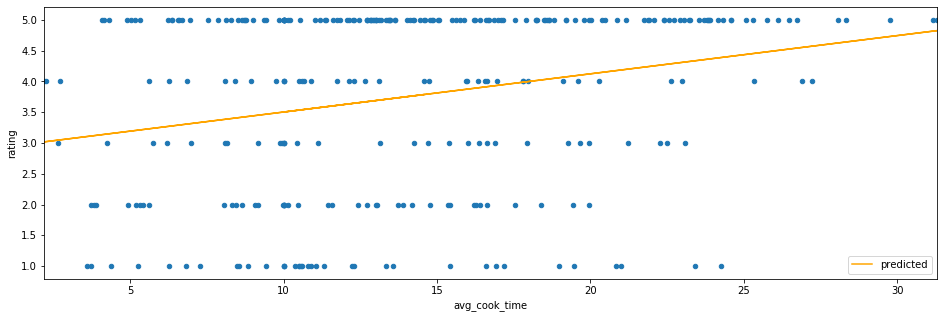

In [19]:
fig = plt.figure(figsize=(16, 5))
ax1 = plt.subplot(111)

df.plot.scatter('avg_cook_time', 'rating', ax=ax1)
df.plot.line('avg_cook_time', 'predicted', ax=ax1, color='orange')

In [20]:
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     20.84
Date:                Wed, 04 Dec 2019   Prob (F-statistic):           7.31e-06
Time:                        20:36:22   Log-Likelihood:                -533.75
No. Observations:                 300   AIC:                             1072.
Df Residuals:                     298   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.8817      0.208     13.840

In [21]:
fitted.rsquared, fitted.rsquared_adj

(0.06536051321003378, 0.06222413909328883)

Мы использовали только 1 признак - среднее время готовки. Попробуем использовать два - для заказчиков важно полное время, за которое до них доходит заказ.

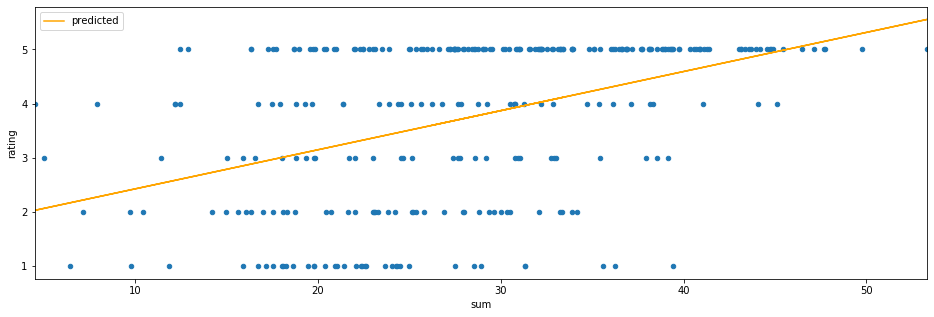

In [22]:
df['sum'] = df['avg_cook_time'] + df['avg_rest_toclient_time']
model = smf.ols('rating~sum', data=df)
fitted = model.fit()
fitted.params
df['predicted'] = fitted.params[0] + fitted.params[1] * df['sum']
fig = plt.figure(figsize=(16, 5))
ax1 = plt.subplot(111)

df.plot.scatter('sum', 'rating', ax=ax1)
df.plot.line('sum', 'predicted', ax=ax1, color='orange')

In [23]:
fitted.rsquared, fitted.rsquared_adj

(0.19828050855369106, 0.19559017468977724)

Получилось немного улучшить модель

### Задание 5

Дана таблица **ORDERS** со следующими столбцами: id (идентификатор заказа), city_id (идентификатор города), user_id (идентификатор клиента).
Также дана таблица **CITIES**, поля - id (идентификатор города), city_name (название города).
Задача - написать SQL-запрос, отвечающий на следующий вопрос: сколько уникальных клиентов выполнили заказ в городах на букву П.

In [ ]:
"""SELECT count(*) FROM (SELECT DISTINCT user_id 
FROM orders JOIN cities ON orders.city_id = cities.id 
WHERE city_name LIKE 'П%')"""